About the notebook

The Eurovision Song Contest began as a technical experiment in television broadcasting: the live, simultaneous, transnational broadcast that Europe has now been watching for nearly 70 years was in the late 1950s a marvel.

The first Eurovision Song Contest was held on May 24, 1956, and saw seven nations compete: the Netherlands, Switzerland, Belgium, Germany, France, Luxembourg and Italy. Austria and Denmark wanted to take part but missed the deadline, and the United Kingdom sent their apologies as they were busy with their own contest that year.

In [1]:
#Load the packages

import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

In [3]:
#Load the dataset
euro = pd.read_excel("eurovision_1998 to 2012.xlsx")
euro.head(5)

,Unnamed: 0,Year,Country,Region,Artist,Song,Artist.gender,Group.Solo,Place,Points,...,danceability,tempo,speechiness,key,liveness,time_signature,mode,loudness,valence,Happiness
0,1,2009,Lithuania,Former Socialist Bloc,Sasha Son,Love,Male,Solo,23,23,...,0.598360,102.984,0.027817,9.0,0.078643,3.0,0.0,-9.082,0.482059,6.148232
1,2,2009,Israel,Independent,Noa and Mira Awad,There Must Be Another Way,Female,Group,16,53,...,0.604542,105.972,0.024996,8.0,0.084805,4.0,1.0,-6.059,0.426209,5.141887
2,3,2009,France,Western Europe,Patricia Kaas,Et s'il fallait le faire,Female,Solo,8,107,...,0.367344,124.005,0.043751,1.0,0.923905,4.0,1.0,-8.655,0.292870,5.069762
3,4,2009,Sweden,Scandinavia,Malena Ernman,La voix,Female,Solo,21,33,...,0.513202,128.021,0.034855,10.0,0.143708,4.0,1.0,-4.536,0.206493,5.502692
4,5,2009,Croatia,Former Yugoslavia,Igor Cukrov feat. Andrea,Lijepa Tena,Both,Group,18,45,...,0.590592,116.107,0.032406,1.0,0.079322,4.0,0.0,-4.427,0.344541,NaN


In [35]:
print("There are {} observations and {} features in this dataset. \n".format(euro.shape[0],euro.shape[1]))

print("There are {} types of artist in this dataset such as {}... \n".format(len(euro.Artist.unique()),
                                                                           ", ".join(euro.Artist.unique()[0:5])))

print("There are {} Songs record in this dataset such as {}... \n".format(len(euro.Song.unique()),
                                                                                      ", ".join(euro.Song.unique()[0:5])))
print("There are {} Songs from differents Countries in this dataset such as {}... \n".format(len(euro.Country.unique()),
                                                                                      ", ".join(euro.Country.unique()[0:5])))

There are 648 observations and 30 features in this dataset. 

There are 530 types of artist in this dataset such as Sasha Son , Noa and Mira Awad , Patricia Kaas , Malena Ernman , Igor Cukrov feat. Andrea ... 

There are 509 Songs record in this dataset such as Love, There Must Be Another Way, Et s'il fallait le faire, La voix, Lijepa Tena... 

There are 48 Songs from deffernt Countries in this dataset such as Lithuania, Israel, France, Sweden, Croatia... 



**Next well start by cleaning the data and data transformation**

*Data cleaning*

The primary data consists of irregular and inconsistent values, which lead to many difficulties. When using data, the insights and
 analysis extracted are only as good as the data we use. Essentially, when irregular data is in, then irregular analysis comes out.
Here’s where data cleaning comes into play. Data cleansing is an essential part of the data analytics process. Data cleaning removes
incorrect, corrupted, garbage, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [4]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         648 non-null    int64  
 1   Year               648 non-null    int64  
 2   Country            648 non-null    object 
 3   Region             648 non-null    object 
 4   Artist             648 non-null    object 
 5   Song               648 non-null    object 
 6   Artist.gender      226 non-null    object 
 7   Group.Solo         226 non-null    object 
 8   Place              648 non-null    int64  
 9   Points             648 non-null    int64  
 10  Home.Away.Country  648 non-null    object 
 11  Home.Away.Region   648 non-null    object 
 12  Is.Final           648 non-null    int64  
 13  Semi.Final.Number  281 non-null    float64
 14  Song.In.English    648 non-null    int64  
 15  Song.Quality       648 non-null    float64
 16  Normalized.Points  648 non

In [5]:
#null values check

euro.isnull().sum()

Unnamed: 0             0
Year                   0
Country                0
Region                 0
Artist                 0
Song                   0
Artist.gender        422
Group.Solo           422
Place                  0
Points                 0
Home.Away.Country      0
Home.Away.Region       0
Is.Final               0
Semi.Final.Number    367
Song.In.English        0
Song.Quality           0
Normalized.Points      0
energy               166
duration             166
acousticness         168
danceability         166
tempo                166
speechiness          166
key                  166
liveness             166
time_signature       166
mode                 166
loudness             166
valence              168
Happiness            344
dtype: int64

In [9]:

#Percentage of missing value per column's name

percent_missing = euro.isnull().sum() * 100 / len(euro)
percent_missing

Unnamed: 0            0.000000
Year                  0.000000
Country               0.000000
Region                0.000000
Artist                0.000000
Song                  0.000000
Artist.gender        65.123457
Group.Solo           65.123457
Place                 0.000000
Points                0.000000
Home.Away.Country     0.000000
Home.Away.Region      0.000000
Is.Final              0.000000
Semi.Final.Number    56.635802
Song.In.English       0.000000
Song.Quality          0.000000
Normalized.Points     0.000000
energy               25.617284
duration             25.617284
acousticness         25.925926
danceability         25.617284
tempo                25.617284
speechiness          25.617284
key                  25.617284
liveness             25.617284
time_signature       25.617284
mode                 25.617284
loudness             25.617284
valence              25.925926
Happiness            53.086420
dtype: float64

There's so much missing value in this dataset

In [10]:
#just for the purpose of this analysis we replace all the nan value with the mean values in the numeric columns
euro_df = euro.fillna(euro.mean())

<ipython-input-10-35d5919faecb>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  euro_df = euro.fillna(euro.mean())


In [11]:
euro_df.isnull().sum()

Unnamed: 0             0
Year                   0
Country                0
Region                 0
Artist                 0
Song                   0
Artist.gender        422
Group.Solo           422
Place                  0
Points                 0
Home.Away.Country      0
Home.Away.Region       0
Is.Final               0
Semi.Final.Number      0
Song.In.English        0
Song.Quality           0
Normalized.Points      0
energy                 0
duration               0
acousticness           0
danceability           0
tempo                  0
speechiness            0
key                    0
liveness               0
time_signature         0
mode                   0
loudness               0
valence                0
Happiness              0
dtype: int64

In [12]:

euro['Artist.gender'].value_counts(normalize=True)

Female    0.446903
Male      0.415929
Both      0.137168
Name: Artist.gender, dtype: float64

In [ ]:
euro['Group.Solo'].value_counts(normalize=True)

Solo     0.676991
Group    0.323009
Name: Group.Solo, dtype: float64

In [ ]:
euro['Year'].value_counts()

2008    63
2011    63
2009    62
2012    62
2010    59
2007    52
2005    49
2006    47
2004    46
2003    26
1998    25
2002    24
2000    24
2001    23
1999    23
Name: Year, dtype: int64

In [ ]:
euro_df.describe()

,Unnamed: 0,Year,Place,Points,Is.Final,Semi.Final.Number,Song.In.English,Song.Quality,Normalized.Points,energy,...,danceability,tempo,speechiness,key,liveness,time_signature,mode,loudness,valence,Happiness
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,...,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,324.500000,2006.543210,11.858025,77.783951,0.566358,1.327402,0.728395,2.636140,0.044753,0.725833,...,0.571246,113.905349,0.056576,5.782158,0.201399,3.900415,0.580913,-6.516718,0.521286,5.406843
std,187.205769,4.016733,6.795186,63.301464,0.495960,0.309257,0.445131,2.089733,0.034887,0.160956,...,0.117376,21.519862,0.043613,2.978056,0.148786,0.418321,0.425872,2.033446,0.203533,0.197690
min,1.000000,1998.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.424200,0.000000,0.064730,...,0.183719,64.971000,0.023994,0.000000,0.026513,1.000000,0.000000,-21.878000,0.017786,4.375630
25%,162.750000,2004.000000,6.000000,30.000000,0.000000,1.000000,0.000000,1.017664,0.017946,0.672746,...,0.528208,101.299000,0.034902,4.000000,0.103155,3.900415,0.000000,-6.893250,0.415028,5.406843
50%,324.500000,2007.000000,12.000000,62.000000,1.000000,1.327402,1.000000,2.054728,0.035151,0.725833,...,0.571246,113.905349,0.050204,5.782158,0.201399,4.000000,0.580913,-6.516718,0.521286,5.406843
75%,486.250000,2010.000000,17.000000,110.000000,1.000000,1.327402,1.000000,3.864811,0.065451,0.852038,...,0.641908,127.959500,0.056576,8.000000,0.204204,4.000000,1.000000,-5.411250,0.666445,5.448866
max,648.000000,2012.000000,28.000000,387.000000,1.000000,2.000000,1.000000,9.795199,0.158867,0.999169,...,0.894179,211.985000,0.505107,11.000000,0.987510,7.000000,1.000000,-2.352000,0.971989,6.148232


<ipython-input-14-293359eeaee7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = euro_df.corr()


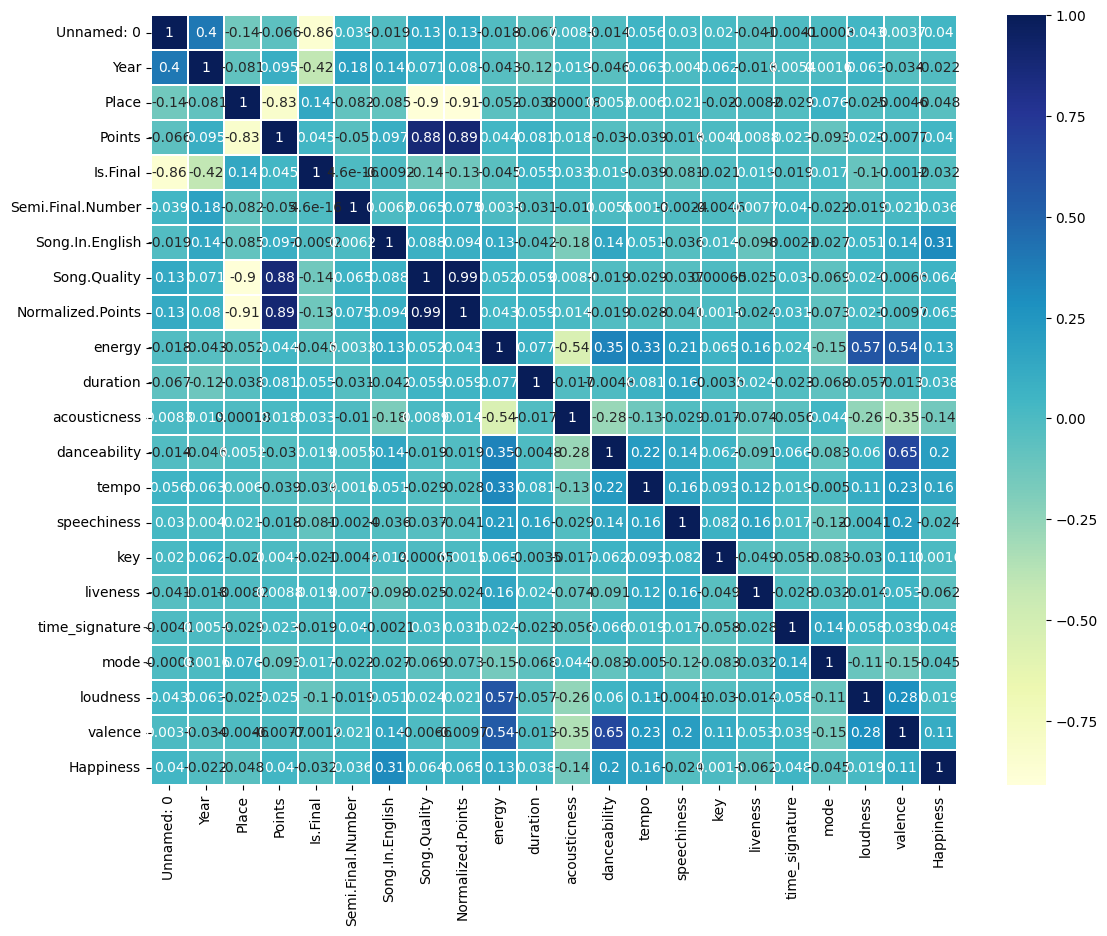

In [ ]:
# correlation plot (heatmap)
plt.figure(figsize=(13,10))
corr = euro_df.corr()
sns.heatmap(corr, cmap = 'YlGnBu', annot= True, linewidths=.1);

In [ ]:
index_vals = euro_df['Artist'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='energy',
                                 values=euro_df['energy']),
                            dict(label='danceability',
                                 values=euro_df['danceability']),
                            dict(label='Song.Quality',
                                 values=euro_df['Song.Quality']),
                            dict(label='duration',
                                 values=euro_df['duration'])],
                showupperhalf=False,
                text=euro_df['Song'],
                marker=dict(color=index_vals,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Songs list',
    width=900,
    height=900,
)

fig.show()

Text(0.5, 1.0, 'Energy vs Song quality per gender')

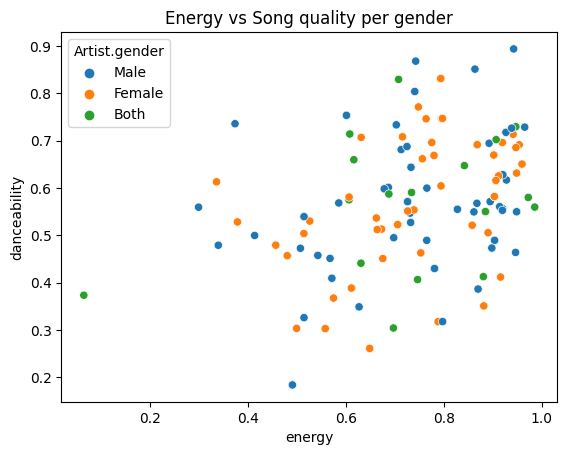

In [ ]:
# using sequencial color for Gender scheme
sns.scatterplot(x='energy', y='danceability', hue='Artist.gender', data=euro_df)
plt.title('Energy vs Song quality per gender')

<Axes: >

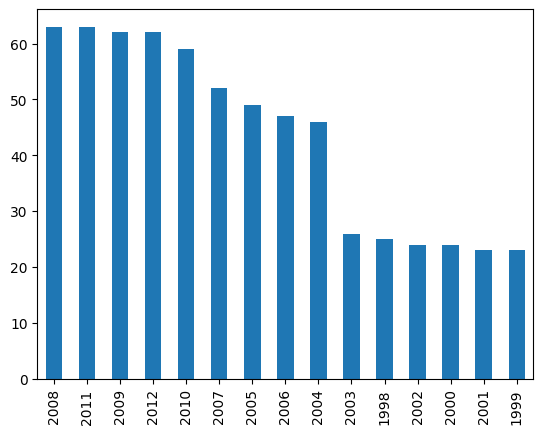

In [ ]:
#number of song per year

euro_df['Year'].value_counts().plot.bar()

<Axes: >

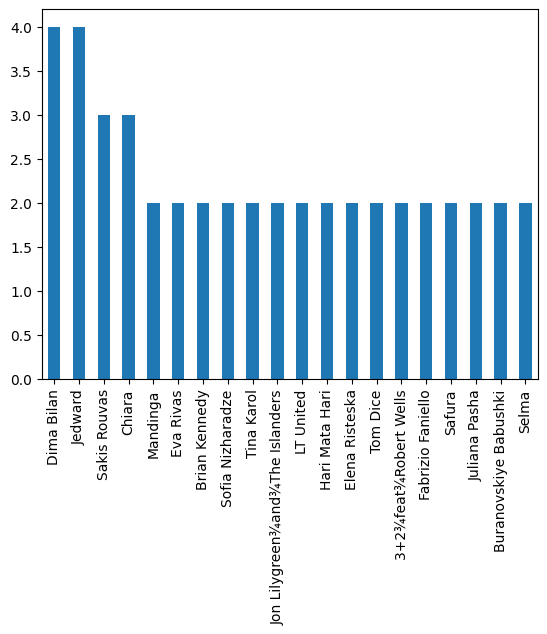

In [ ]:
#number of Artist per year

euro_df['Artist'].value_counts().head(20).plot.bar()

<Axes: >

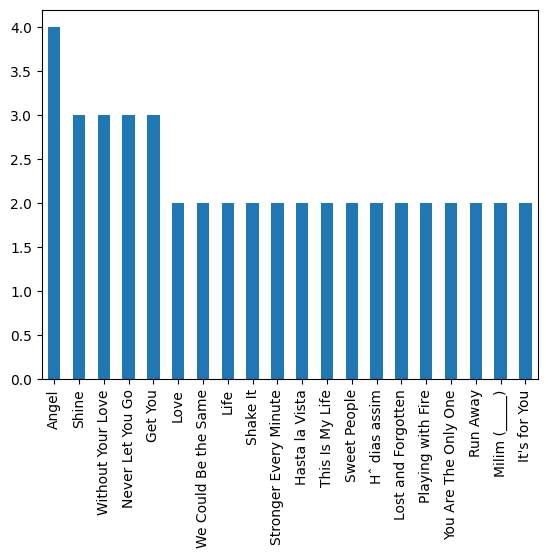

In [ ]:
#top 10 songs

euro_df['Song'].value_counts().head(20).plot.bar()

<Axes: >

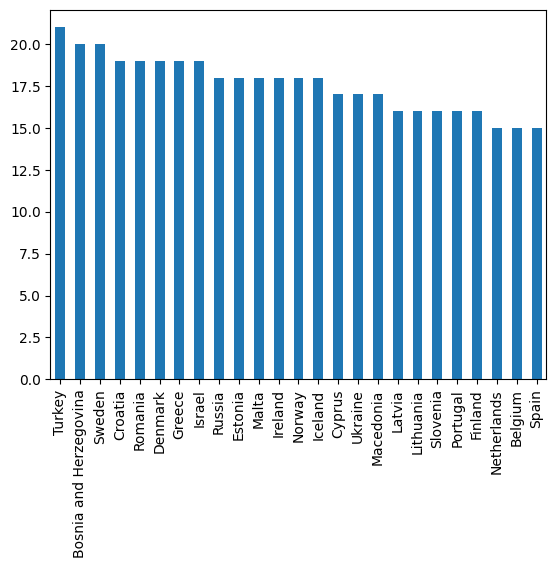

In [ ]:
euro_df['Country'].value_counts().head(25).plot.bar()

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


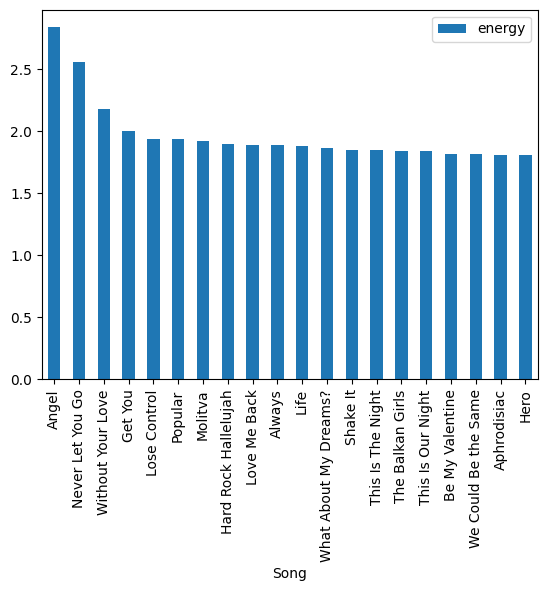

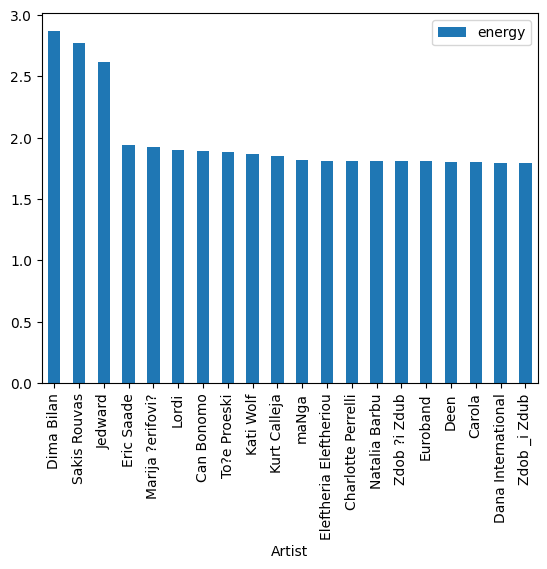

In [95]:
top_song =  euro_df.groupby('Song').agg({'energy':'sum'}).round(2).sort_values('energy', ascending=False).head(20).plot.bar()
print(top_song)

top_Artist =  euro_df.groupby('Artist').agg({'energy':'sum'}).round(2).sort_values('energy', ascending=False).head(20).plot.bar()
print(top_Artist)

Axes(0.125,0.11;0.775x0.77)


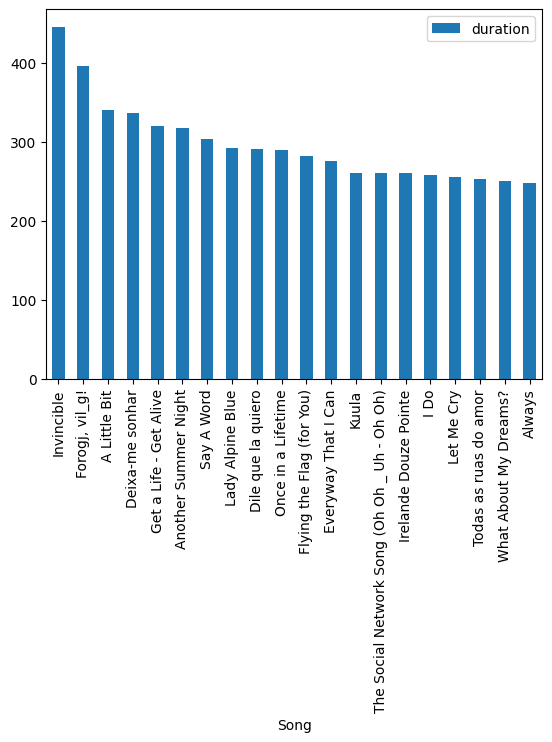

In [86]:
longest_song =  euro_df.groupby('Song').agg({'duration':'mean'}).round(2).sort_values('duration', ascending=False).head(20).plot.bar()
print(longest_song)

In [39]:
euro_df[['Country','Artist','Song','energy']].head(10)

,Country,Artist,Song,energy
0,Lithuania,Sasha Son,Love,0.678258
1,Israel,Noa and Mira Awad,There Must Be Another Way,0.794093
2,France,Patricia Kaas,Et s'il fallait le faire,0.574628
3,Sweden,Malena Ernman,La voix,0.672746
4,Croatia,Igor Cukrov feat. Andrea,Lijepa Tena,0.733959
5,Portugal,Flor-de-Lis,Todas as ruas do amor,0.606222
6,Iceland,Yohanna,Is It True?,0.648462
7,Greece,Sakis Rouvas,This Is Our Night,0.920414
8,Armenia,Inga and Anush,Jan Jan,0.868098
9,Russia,Anastasiya Prikhodko,Mamo,0.948516


**Create groups to compare features**
To make comparisons between groups of a feature, you can use groupby() and compute summary statistics.

With the eurovision dataset, you can group by country and look at summary statistics for all countries'

In [42]:
# Groupby by country
country = euro_df.groupby("Country")

# Summary statistic of all countries
country.describe().head()

Unnamed: 0                                                        \
                count        mean         std    min     25%    50%     75%   
Country                                                                       
Albania          14.0  357.285714  207.837743   19.0  177.75  415.0  517.25   
Andorra           6.0  460.333333   56.979528  374.0  427.75  468.5  501.75   
Armenia          10.0  300.300000  229.405052    9.0   79.25  358.5  457.75   
Austria          10.0  333.300000  172.902060  124.0  192.00  276.5  487.75   
Azerbaijan        9.0  333.000000  203.546064   11.0  293.00  345.0  411.00   

                   Year               ...   valence           Happiness  \
              max count         mean  ...       75%       max     count   
Country                               ...                                 
Albania     615.0  14.0  2008.214286  ...  0.620619  0.750208      14.0   
Andorra     524.0   6.0  2006.500000  ...  0.860160  0.949078       6.0   
Armenia     616.0  10.0  2008.400000  ...  0.698633  0.914923      10.0   
Austria     580.0  10.0  2005.400000  ...  0.618682  0.908716      10.0   
Azerbaijan  617.0   9.0  2009.777778  ...  0.459718  0.818512       9.0   

                                                                        \
                mean       std       min       25%       50%       75%   
Country                                                                  
Albania     5.399714  0.206229  4.941053  5.406843  5.406843  5.547889   
Andorra     5.406843  0.000000  5.406843  5.406843  5.406843  5.406843   
Armenia     5.392922  0.029348  5.337239  5.406843  5.406843  5.406843   
Austria     5.356075  0.325758  4.610282  5.406843  5.406843  5.541746   
Azerbaijan  5.363344  0.285475  4.992432  5.207500  5.406843  5.592165   

                      
                 max  
Country               
Albania     5.567609  
Andorra     5.406843  
Armenia     5.406843  
Austria     5.650385  
Azerbaijan  5.732192  

[5 rows x 176 columns]

In [43]:
#This selects the top 5 highest average points among all 48 countries:


country.mean().sort_values(by="energy",ascending=False).head()

<ipython-input-43-8f2462b4e02c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country.mean().sort_values(by="energy",ascending=False).head()


,Unnamed: 0,Year,Place,Points,Is.Final,Semi.Final.Number,Song.In.English,Song.Quality,Normalized.Points,energy,...,danceability,tempo,speechiness,key,liveness,time_signature,mode,loudness,valence,Happiness
Country,,,,,,,,,,,,,,,,,,,,,
Moldova,343.428571,2008.714286,10.642857,85.500000,0.500000,1.306558,1.000000,2.653181,0.045942,0.838175,...,0.618864,121.675143,0.058428,6.500000,0.171579,4.000000,0.285714,-5.035000,0.564433,5.360349
Sweden,276.700000,2006.050000,7.950000,120.600000,0.700000,1.379181,0.950000,4.262059,0.071376,0.833498,...,0.551915,123.974352,0.050005,6.467324,0.159106,3.985062,0.637137,-5.110658,0.555364,5.570264
Montenegro,455.750000,2009.000000,15.500000,30.000000,0.000000,1.250000,0.500000,1.454278,0.021695,0.825624,...,0.631097,124.205587,0.056642,7.945539,0.216685,3.975104,0.645228,-5.623429,0.614939,5.406843
Andorra,460.333333,2006.500000,17.833333,26.166667,0.000000,1.000000,0.500000,0.720320,0.013273,0.813341,...,0.648356,119.511891,0.049914,4.963693,0.106418,3.816736,0.930152,-4.463953,0.735019,5.406843
Greece,283.789474,2006.842105,7.052632,131.842105,0.684211,1.329275,0.842105,4.360884,0.074879,0.807512,...,0.606422,114.666234,0.048953,5.814479,0.185692,3.963311,0.371915,-5.963791,0.633951,5.387055


**Plot the data**


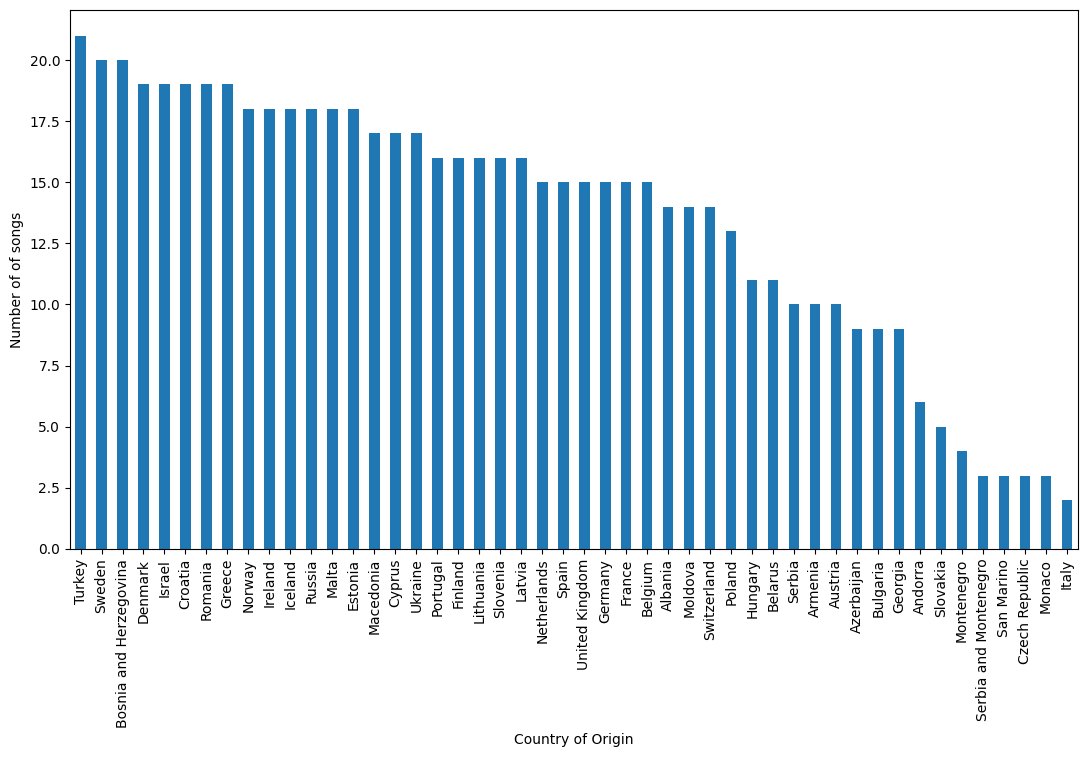

In [54]:
plt.figure(figsize=(13,7))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Country of Origin")
plt.ylabel("Number of of songs")
plt.show()

<ipython-input-56-a9845c5e4d37>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country.mean().sort_values(by="energy",ascending=False)["energy"].plot.bar()


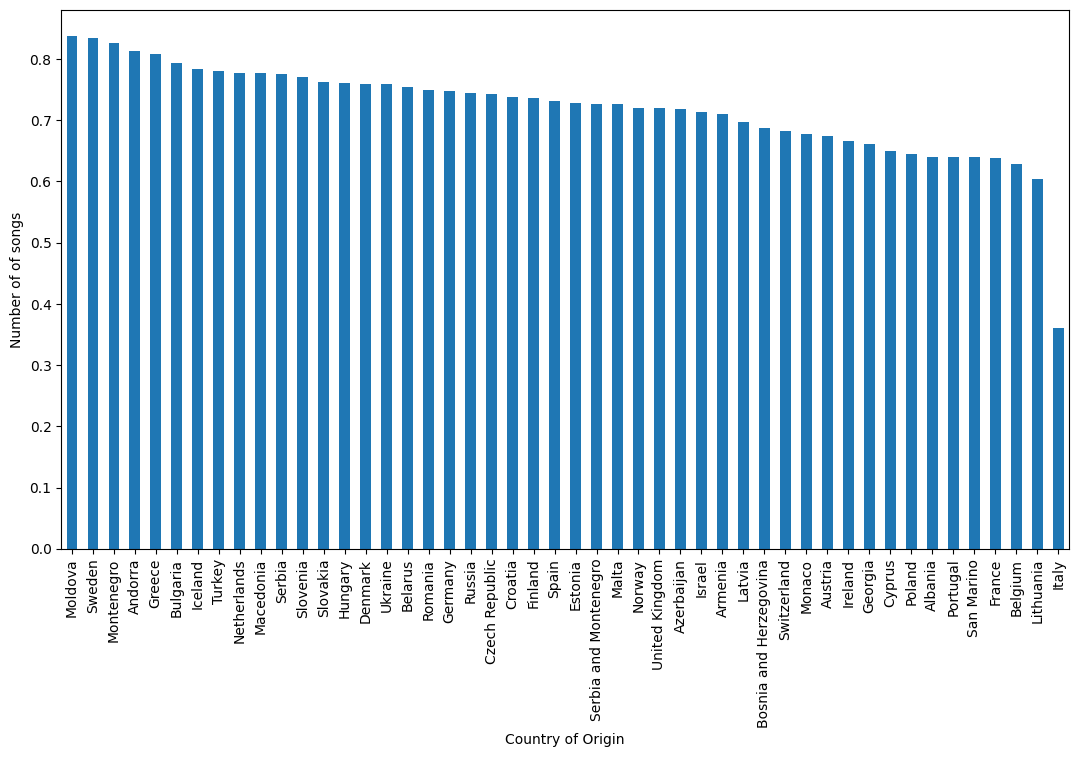

In [56]:
plt.figure(figsize=(13,7))
country.mean().sort_values(by="energy",ascending=False)["energy"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Country of Origin")
plt.ylabel("Number of of songs")
plt.show()

<ipython-input-98-9e6c0b97cd83>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country.mean().sort_values(by="duration",ascending=False)["duration"].plot.bar()


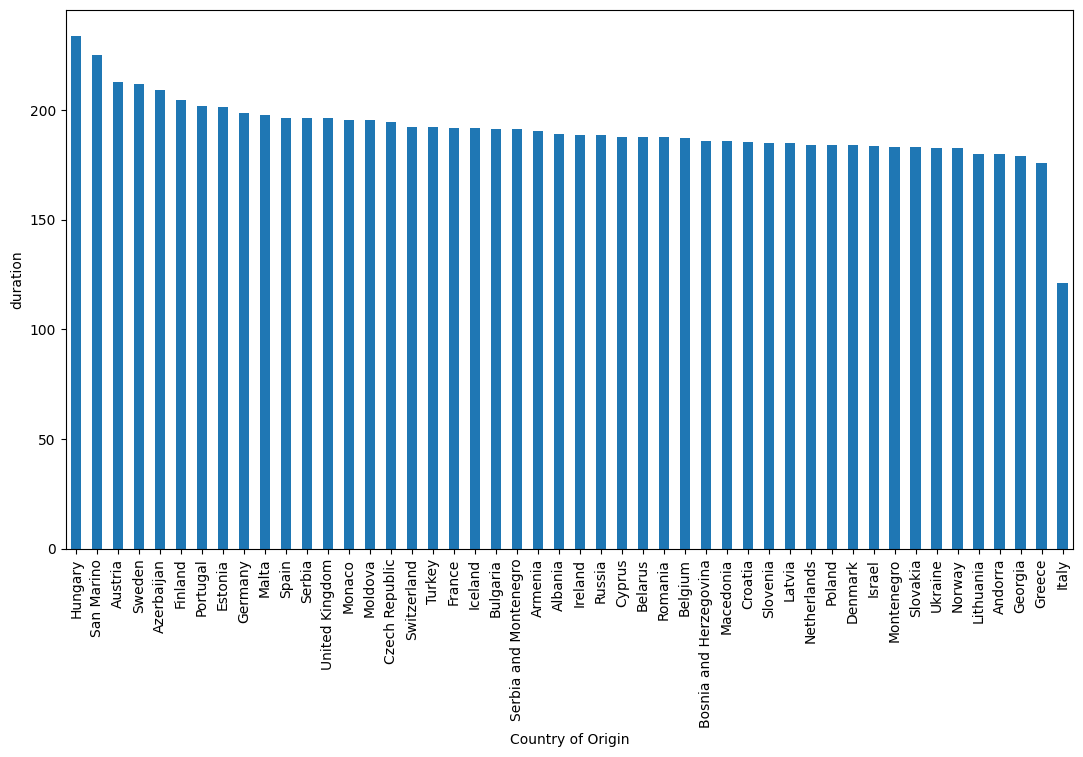

In [98]:
plt.figure(figsize=(13,7))
country.mean().sort_values(by="duration",ascending=False)["duration"].plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Country of Origin")
plt.ylabel("duration")
plt.show()